# FeatureExtraction

In [99]:
from scipy.stats import skew
import os
import csv
import pandas as pd
from tqdm import tqdm

In [100]:
def extractFeatures(data):
	mean = data.mean()
	rmax = data.max()
	rmin = data.min()
	variance = data.var()
	std = data.std()
	skew1  = skew(data)
	features = [mean, rmax, rmin, variance, std, skew1]
	return features

def makeFeatureHeader(features, colNames):
	header = []
	for col in colNames:
		for feature in features:
			header.append(col + "_" + feature)
	header.append("activity")
	return header

In [101]:
features = ["mean", "max", "min", "var", "std", "skew"]
activites = {'a01': 'sitting', 'a02': 'standing', 'a03': 'lyingBack','a04':'lyingRigh','a05':'ascendingStairs','a06':'decendingStairs', 'a07':'standingInElevatorStill','a08':'movingInElevator','a09':'walkingLot','a10':'walkingTreadmillFlat', 'a11':'walkingTreadmillIncline','a12':'runningTreadmill','a13':'stepper', 'a14':'crossTrainer', 'a15':'cyclingHorizontal','a16':'cyclingVertical','a17':'rowing','a18':'jumping','a19':'basketBall'} 
people = ['p1','p2','p3','p4','p5','p6','p7','p8']

collumNames = ["T_xacc", "T_yacc", "T_zacc", "T_xgyro","T_ygyro","T_zgyro","T_xmag", "T_ymag", "T_zmag",
"RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro", "RA_ygyro","RA_zgyro", "RA_xmag", "RA_ymag", "RA_zmag",
"LA_xacc", "LA_yacc", "LA_zacc", "LA_xgyro", "LA_ygyro","LA_zgyro", "LA_xmag", "LA_ymag", "LA_zmag",
"RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro", "RL_ygyro","RL_zgyro", "RL_xmag", "RL_ymag", "RL_zmag",
"LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro", "LL_ygyro","LL_zgyro", "LL_xmag", "LL_ymag", "LL_zmag"]


In [102]:
mainDir = "D:/HAR/DSADS/data/"

In [103]:
features_df = []
header = makeFeatureHeader(features, collumNames)
features_df.append(header)
for activity in tqdm(activites):
	for person in tqdm(people):
		segments = os.listdir(mainDir + activity + "/" + person)
		segments.sort()
		if ".DS_Store" in segments:
			segments.remove(".DS_Store")
		for segment in segments:
			row = []
			fpath = mainDir + activity + "/" + person + "/" + segment
			df = pd.read_csv(fpath, names = collumNames)
			for col in collumNames:
				features = extractFeatures(df[col])
				row.extend(features)
			row.append(activites[activity])
			features_df.append(row)

with open("features.csv", "w", newline = "") as f:
	writer = csv.writer(f)
	writer.writerows(features_df)


 88%|██████████████████████████████████████▌     | 7/8 [00:16<00:02,  2.42s/it]


100%|██████████████████████████████████████████| 19/19 [05:37<00:00, 17.74s/it]


In [105]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

In [106]:
features = pd.read_csv("features.csv")

In [107]:
features

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,4.033226e-02,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,2.212497e-02,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,9.656444e-02,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,2.448990e-02,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall


In [108]:
features.to_csv("D:/HAR/DSADS/DSA_RAW.csv")

In [109]:
features['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [110]:
indexes = features[(features['activity'] == 'crosstester')].index
features.drop(indexes , inplace=True)

indexes = features[(features['activity'] == 'stepper')].index
features.drop(indexes , inplace=True)

indexes = features[(features['activity'] == 'stepper')].index
features.drop(indexes , inplace=True)

indexes = features[(features['activity'] == 'cyclingVertical')].index
features.drop(indexes , inplace=True)

indexes = features[(features['activity'] == 'standingInElevatorStill')].index
features.drop(indexes , inplace=True)

indexes = features[(features['activity'] == 'cyclingHorizontal')].index
features.drop(indexes , inplace=True)

indexes = features[(features['activity'] == 'basketBall')].index
features.drop(indexes , inplace=True)

indexes = features[(features['activity'] == 'rowing')].index
features.drop(indexes , inplace=True)

indexes = features[(features['activity'] == 'movingInElevator')].index
features.drop(indexes , inplace=True)

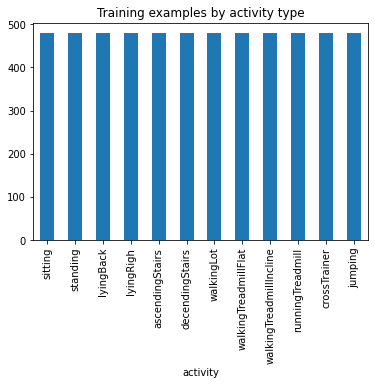

In [111]:
features['activity'].value_counts().plot(kind='bar', title='Training examples by activity type');

In [112]:
features

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.18320,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.21290,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.21280,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.31700,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.25740,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,9.298029,32.4980,-6.0782,134.634624,11.603216,0.570723,-2.592341,1.73230,-12.91800,9.207424,...,9.303061e-04,0.030501,0.334449,0.625187,0.691300,0.571870,9.188517e-04,0.030313,0.274486,jumping
8636,8.738784,34.0480,-6.7822,145.225186,12.050941,0.760224,-2.417799,1.19030,-10.90200,9.233904,...,9.968638e-04,0.031573,0.396417,0.624749,0.693560,0.570400,9.632708e-04,0.031037,0.433661,jumping
8637,9.404261,34.8670,-5.3331,130.142955,11.408022,0.560963,-2.408945,0.81347,-8.21750,6.635468,...,9.194098e-04,0.030322,0.524964,0.631822,0.690120,0.581970,8.933477e-04,0.029889,0.335023,jumping
8638,9.139112,32.5060,-6.8835,135.812815,11.653876,0.589304,-2.359531,1.32350,-9.57930,7.510565,...,5.788992e-04,0.024060,0.301200,0.624196,0.688560,0.573620,1.025797e-03,0.032028,0.272121,jumping


In [113]:
features.to_csv("D:/HAR/DSADS/DSA.csv")

# CHECK POINT

In [114]:
features = pd.read_csv("D:/HAR/DSADS/DSA.csv", index_col=0)

In [115]:
features 

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.18320,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.21290,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.21280,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.31700,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.25740,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,9.298029,32.4980,-6.0782,134.634624,11.603216,0.570723,-2.592341,1.73230,-12.91800,9.207424,...,9.303061e-04,0.030501,0.334449,0.625187,0.691300,0.571870,9.188517e-04,0.030313,0.274486,jumping
8636,8.738784,34.0480,-6.7822,145.225186,12.050941,0.760224,-2.417799,1.19030,-10.90200,9.233904,...,9.968638e-04,0.031573,0.396417,0.624749,0.693560,0.570400,9.632708e-04,0.031037,0.433661,jumping
8637,9.404261,34.8670,-5.3331,130.142955,11.408022,0.560963,-2.408945,0.81347,-8.21750,6.635468,...,9.194098e-04,0.030322,0.524964,0.631822,0.690120,0.581970,8.933477e-04,0.029889,0.335023,jumping
8638,9.139112,32.5060,-6.8835,135.812815,11.653876,0.589304,-2.359531,1.32350,-9.57930,7.510565,...,5.788992e-04,0.024060,0.301200,0.624196,0.688560,0.573620,1.025797e-03,0.032028,0.272121,jumping


In [116]:
# The number of steps within one time segment
TIME_PERIODS = 80

# The steps to take from one segment to the next; if this value is equal to TIME_PERIODS, then there is
# no overlap between the segments
STEP_DISTANCE = 40

In [117]:
##x,y,z dont have the same variance so we need to scale the data 
#Standardized data:

from sklearn.preprocessing import StandardScaler

X = features[["T_xacc_mean", "T_xacc_max", "T_xacc_min","T_xacc_var", \
       "T_xacc_std", "T_xacc_skew", "T_yacc_mean", "T_yacc_max", "T_yacc_min", \
       "T_yacc_var", "T_yacc_std", "T_yacc_skew", "T_zacc_mean", "T_zacc_max", \
       "T_zacc_min", "T_zacc_var", "T_zacc_std", "T_zacc_skew", "T_xgyro_mean", \
       "T_xgyro_max", "T_xgyro_min", "T_xgyro_var", "T_xgyro_std", \
       "T_xgyro_skew", "T_ygyro_mean", "T_ygyro_max", "T_ygyro_min", \
       "T_ygyro_var", "T_ygyro_std", "T_ygyro_skew", "T_zgyro_mean", \
       "T_zgyro_max", "T_zgyro_min", "T_zgyro_var", "T_zgyro_std", \
       "T_zgyro_skew", "T_xmag_mean", "T_xmag_max", "T_xmag_min", "T_xmag_var",  \
       "T_xmag_std", "T_xmag_skew", "T_ymag_mean", "T_ymag_max", "T_ymag_min", \
       "T_ymag_var", "T_ymag_std", "T_ymag_skew", "T_zmag_mean", "T_zmag_max", \
       "T_zmag_min", "T_zmag_var", "T_zmag_std", "T_zmag_skew"]]
              
y= features['activity']
              
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ["T_xacc_mean", "T_xacc_max", "T_xacc_min","T_xacc_var", \
       "T_xacc_std", "T_xacc_skew", "T_yacc_mean", "T_yacc_max", "T_yacc_min", \
       "T_yacc_var", "T_yacc_std", "T_yacc_skew", "T_zacc_mean", "T_zacc_max", \
       "T_zacc_min", "T_zacc_var", "T_zacc_std", "T_zacc_skew", "T_xgyro_mean", \
       "T_xgyro_max", "T_xgyro_min", "T_xgyro_var", "T_xgyro_std", \
       "T_xgyro_skew", "T_ygyro_mean", "T_ygyro_max", "T_ygyro_min", \
       "T_ygyro_var", "T_ygyro_std", "T_ygyro_skew", "T_zgyro_mean", \
       "T_zgyro_max", "T_zgyro_min", "T_zgyro_var", "T_zgyro_std", \
       "T_zgyro_skew", "T_xmag_mean", "T_xmag_max", "T_xmag_min", "T_xmag_var",  \
       "T_xmag_std", "T_xmag_skew", "T_ymag_mean", "T_ymag_max", "T_ymag_min", \
       "T_ymag_var", "T_ymag_std", "T_ymag_skew", "T_zmag_mean", "T_zmag_max", \
       "T_zmag_min", "T_zmag_var", "T_zmag_std", "T_zmag_skew"])
scaled_X['label'] = y.values

scaled_X
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ["T_xacc_mean", "T_xacc_max", "T_xacc_min","T_xacc_var", \
       "T_xacc_std", "T_xacc_skew", "T_yacc_mean", "T_yacc_max", "T_yacc_min", \
       "T_yacc_var", "T_yacc_std", "T_yacc_skew", "T_zacc_mean", "T_zacc_max", \
       "T_zacc_min", "T_zacc_var", "T_zacc_std", "T_zacc_skew", "T_xgyro_mean", \
       "T_xgyro_max", "T_xgyro_min", "T_xgyro_var", "T_xgyro_std", \
       "T_xgyro_skew", "T_ygyro_mean", "T_ygyro_max", "T_ygyro_min", \
       "T_ygyro_var", "T_ygyro_std", "T_ygyro_skew", "T_zgyro_mean", \
       "T_zgyro_max", "T_zgyro_min", "T_zgyro_var", "T_zgyro_std", \
       "T_zgyro_skew", "T_xmag_mean", "T_xmag_max", "T_xmag_min", "T_xmag_var",  \
       "T_xmag_std", "T_xmag_skew", "T_ymag_mean", "T_ymag_max", "T_ymag_min", \
       "T_ymag_var", "T_ymag_std", "T_ymag_skew", "T_zmag_mean", "T_zmag_max", \
       "T_zmag_min", "T_zmag_var", "T_zmag_std", "T_zmag_skew"])
scaled_X['label'] = y.values

scaled_X

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,T_ymag_var,T_ymag_std,T_ymag_skew,T_zmag_mean,T_zmag_max,T_zmag_min,T_zmag_var,T_zmag_std,T_zmag_skew,label
0,0.182335,-0.523125,0.902073,-0.464032,-0.728901,-0.633623,0.860612,-0.075475,1.185402,-0.512648,...,-0.510566,-0.888806,0.974780,1.402187,1.220620,1.528133,-0.394608,-0.523252,0.099736,sitting
1,0.182921,-0.521987,0.931534,-0.464156,-0.737123,0.249580,0.883576,-0.069147,1.199624,-0.512973,...,-0.510781,-0.903877,0.049368,1.405799,1.211584,1.570164,-0.416136,-0.646329,0.928489,sitting
2,0.181219,-0.528489,0.931499,-0.464237,-0.744899,-0.443621,0.883614,-0.069168,1.204664,-0.513035,...,-0.510817,-0.907802,0.462574,1.403777,1.192770,1.572265,-0.429714,-0.757806,-0.063442,sitting
3,0.173705,-0.526884,0.903466,-0.464225,-0.743473,-0.953616,0.893282,-0.046968,1.204453,-0.512656,...,-0.510589,-0.890100,-1.429519,1.390660,1.176901,1.555275,-0.435309,-0.826982,0.663919,sitting
4,0.166884,-0.525285,0.928855,-0.464262,-0.748347,2.535100,0.902132,-0.059666,1.208157,-0.513000,...,-0.510783,-0.904026,-0.220342,1.379943,1.186480,1.561580,-0.436566,-0.847760,3.537104,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,0.488250,1.229327,-1.556426,1.985809,2.124822,0.277663,-0.601804,0.041511,-2.076949,1.586316,...,-0.478330,-0.578885,1.066317,0.105154,0.144865,0.050313,-0.211355,0.033814,0.008187,jumping
5756,0.358869,1.340937,-1.682205,2.178538,2.236087,0.568366,-0.532356,-0.073962,-1.604315,1.592354,...,-0.495122,-0.683357,-0.213188,0.101692,0.092511,0.098767,-0.251979,-0.059807,0.455507,jumping
5757,0.512826,1.399910,-1.423304,1.904069,2.076314,0.262691,-0.528834,-0.154246,-0.974958,0.999861,...,-0.492406,-0.663582,-0.155241,0.180301,0.197419,0.215979,-0.264791,-0.091398,0.863064,jumping
5758,0.451485,1.229904,-1.700303,2.007250,2.137412,0.306166,-0.509173,-0.045584,-1.294220,1.199400,...,-0.496572,-0.694618,0.415337,0.163609,0.281139,0.099122,-0.103234,0.248449,0.297253,jumping


In [124]:
scaled_X

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,T_ymag_var,T_ymag_std,T_ymag_skew,T_zmag_mean,T_zmag_max,T_zmag_min,T_zmag_var,T_zmag_std,T_zmag_skew,label
0,0.182335,-0.523125,0.902073,-0.464032,-0.728901,-0.633623,0.860612,-0.075475,1.185402,-0.512648,...,-0.510566,-0.888806,0.974780,1.402187,1.220620,1.528133,-0.394608,-0.523252,0.099736,sitting
1,0.182921,-0.521987,0.931534,-0.464156,-0.737123,0.249580,0.883576,-0.069147,1.199624,-0.512973,...,-0.510781,-0.903877,0.049368,1.405799,1.211584,1.570164,-0.416136,-0.646329,0.928489,sitting
2,0.181219,-0.528489,0.931499,-0.464237,-0.744899,-0.443621,0.883614,-0.069168,1.204664,-0.513035,...,-0.510817,-0.907802,0.462574,1.403777,1.192770,1.572265,-0.429714,-0.757806,-0.063442,sitting
3,0.173705,-0.526884,0.903466,-0.464225,-0.743473,-0.953616,0.893282,-0.046968,1.204453,-0.512656,...,-0.510589,-0.890100,-1.429519,1.390660,1.176901,1.555275,-0.435309,-0.826982,0.663919,sitting
4,0.166884,-0.525285,0.928855,-0.464262,-0.748347,2.535100,0.902132,-0.059666,1.208157,-0.513000,...,-0.510783,-0.904026,-0.220342,1.379943,1.186480,1.561580,-0.436566,-0.847760,3.537104,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,0.488250,1.229327,-1.556426,1.985809,2.124822,0.277663,-0.601804,0.041511,-2.076949,1.586316,...,-0.478330,-0.578885,1.066317,0.105154,0.144865,0.050313,-0.211355,0.033814,0.008187,jumping
5756,0.358869,1.340937,-1.682205,2.178538,2.236087,0.568366,-0.532356,-0.073962,-1.604315,1.592354,...,-0.495122,-0.683357,-0.213188,0.101692,0.092511,0.098767,-0.251979,-0.059807,0.455507,jumping
5757,0.512826,1.399910,-1.423304,1.904069,2.076314,0.262691,-0.528834,-0.154246,-0.974958,0.999861,...,-0.492406,-0.663582,-0.155241,0.180301,0.197419,0.215979,-0.264791,-0.091398,0.863064,jumping
5758,0.451485,1.229904,-1.700303,2.007250,2.137412,0.306166,-0.509173,-0.045584,-1.294220,1.199400,...,-0.496572,-0.694618,0.415337,0.163609,0.281139,0.099122,-0.103234,0.248449,0.297253,jumping


In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                    scaled_X["label"],
                                                    test_size = 0.2, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [160]:
from scipy import stats
import numpy as np

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
       
        # Retrieve the most often used label in this segment
        
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 5
STEP = 5

X_train, y_train = create_dataset(X_train[["T_xacc_mean", "T_xacc_max", "T_xacc_min","T_xacc_var", \
       "T_xacc_std", "T_xacc_skew", "T_yacc_mean", "T_yacc_max", "T_yacc_min", \
       "T_yacc_var", "T_yacc_std", "T_yacc_skew", "T_zacc_mean", "T_zacc_max", \
       "T_zacc_min", "T_zacc_var", "T_zacc_std", "T_zacc_skew", "T_xgyro_mean", \
       "T_xgyro_max", "T_xgyro_min", "T_xgyro_var", "T_xgyro_std", \
       "T_xgyro_skew", "T_ygyro_mean", "T_ygyro_max", "T_ygyro_min", \
       "T_ygyro_var", "T_ygyro_std", "T_ygyro_skew", "T_zgyro_mean", \
       "T_zgyro_max", "T_zgyro_min", "T_zgyro_var", "T_zgyro_std", \
       "T_zgyro_skew", "T_xmag_mean", "T_xmag_max", "T_xmag_min", "T_xmag_var",  \
       "T_xmag_std", "T_xmag_skew", "T_ymag_mean", "T_ymag_max", "T_ymag_min", \
       "T_ymag_var", "T_ymag_std", "T_ymag_skew", "T_zmag_mean", "T_zmag_max", \
       "T_zmag_min", "T_zmag_var", "T_zmag_std", "T_zmag_skew"]], X_train.label, TIME_STEPS,
                                  STEP)
X_test, y_test = create_dataset(X_test[["T_xacc_mean", "T_xacc_max", "T_xacc_min","T_xacc_var", \
       "T_xacc_std", "T_xacc_skew", "T_yacc_mean", "T_yacc_max", "T_yacc_min", \
       "T_yacc_var", "T_yacc_std", "T_yacc_skew", "T_zacc_mean", "T_zacc_max", \
       "T_zacc_min", "T_zacc_var", "T_zacc_std", "T_zacc_skew", "T_xgyro_mean", \
       "T_xgyro_max", "T_xgyro_min", "T_xgyro_var", "T_xgyro_std", \
       "T_xgyro_skew", "T_ygyro_mean", "T_ygyro_max", "T_ygyro_min", \
       "T_ygyro_var", "T_ygyro_std", "T_ygyro_skew", "T_zgyro_mean", \
       "T_zgyro_max", "T_zgyro_min", "T_zgyro_var", "T_zgyro_std", \
       "T_zgyro_skew", "T_xmag_mean", "T_xmag_max", "T_xmag_min", "T_xmag_var",  \
       "T_xmag_std", "T_xmag_skew", "T_ymag_mean", "T_ymag_max", "T_ymag_min", \
       "T_ymag_var", "T_ymag_std", "T_ymag_skew", "T_zmag_mean", "T_zmag_max", \
       "T_zmag_min", "T_zmag_var", "T_zmag_std", "T_zmag_skew"]], X_test.label, TIME_STEPS, STEP)

print(X_train.shape, y_train.shape)

(921, 5, 54) (921, 1)


<ipython-input-160-a40c31acddeb>:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
<ipython-input-160-a40c31acddeb>:10: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  ys.append(stats.mode(labels)[0][0])
<ipython-input-160-a40c31acddeb>:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 

In [161]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [162]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape ", X_test.shape)
print("y_train.shape ", y_train.shape)
print("y_test.shape ", y_test.shape)

X_train.shape:  (921, 5, 54)
X_test.shape  (230, 5, 54)
y_train.shape  (921, 12)
y_test.shape  (230, 12)


In [163]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot

from tensorflow.keras.utils import to_categorical
import tensorflow.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D, Bidirectional
from tensorflow.keras.layers import Input, TimeDistributed, Conv1D, MaxPooling1D
from keras.utils import np_utils

In [184]:
#Epoch 500

verbose, batch_size=1,32 

n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [185]:
n_timesteps,n_features,n_outputs

(5, 54, 12)

In [186]:
# Training and evaluating the LSTM model

model = keras.Sequential()
model.add(Bidirectional(LSTM(units = 128, input_shape = [X_train.shape[1], X_train.shape[2]])))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(y_train.shape[1], activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["acc"])


In [188]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model.summary())

Epoch 1/100
26/26 [==============================] - 0s 12ms/step - loss: 0.0352 - acc: 0.9964 - val_loss: 1.8881 - val_acc: 0.6344
Epoch 2/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0307 - acc: 0.9976 - val_loss: 1.8309 - val_acc: 0.6559
Epoch 3/100
26/26 [==============================] - 0s 10ms/step - loss: 0.0338 - acc: 0.9940 - val_loss: 1.8510 - val_acc: 0.6344
Epoch 4/100
26/26 [==============================] - 0s 10ms/step - loss: 0.0330 - acc: 0.9928 - val_loss: 1.9660 - val_acc: 0.6129
Epoch 5/100
26/26 [==============================] - 0s 12ms/step - loss: 0.0275 - acc: 0.9940 - val_loss: 1.9440 - val_acc: 0.6129
Epoch 6/100
26/26 [==============================] - 0s 11ms/step - loss: 0.0241 - acc: 0.9952 - val_loss: 2.2489 - val_acc: 0.5914
Epoch 7/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0287 - acc: 0.9928 - val_loss: 2.0300 - val_acc: 0.6129
Epoch 8/100
26/26 [==============================] - 0s 9ms/step - loss: 0.019

Epoch 63/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0183 - acc: 0.9940 - val_loss: 2.2877 - val_acc: 0.6237
Epoch 64/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0096 - acc: 0.9964 - val_loss: 2.1254 - val_acc: 0.6129
Epoch 65/100
26/26 [==============================] - 0s 10ms/step - loss: 0.0052 - acc: 1.0000 - val_loss: 2.1776 - val_acc: 0.6452
Epoch 66/100
26/26 [==============================] - 0s 10ms/step - loss: 0.0095 - acc: 0.9976 - val_loss: 2.2510 - val_acc: 0.6237
Epoch 67/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 2.3282 - val_acc: 0.6237
Epoch 68/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0021 - acc: 1.0000 - val_loss: 2.3872 - val_acc: 0.6344
Epoch 69/100
26/26 [==============================] - 0s 9ms/step - loss: 0.0072 - acc: 0.9976 - val_loss: 2.4998 - val_acc: 0.6022
Epoch 70/100
26/26 [==============================] - 0s 9ms/step - loss: 

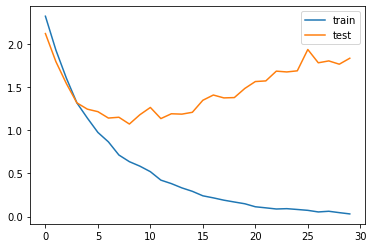

In [168]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

In [169]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

8/8 [==============================] - 1s 4ms/step


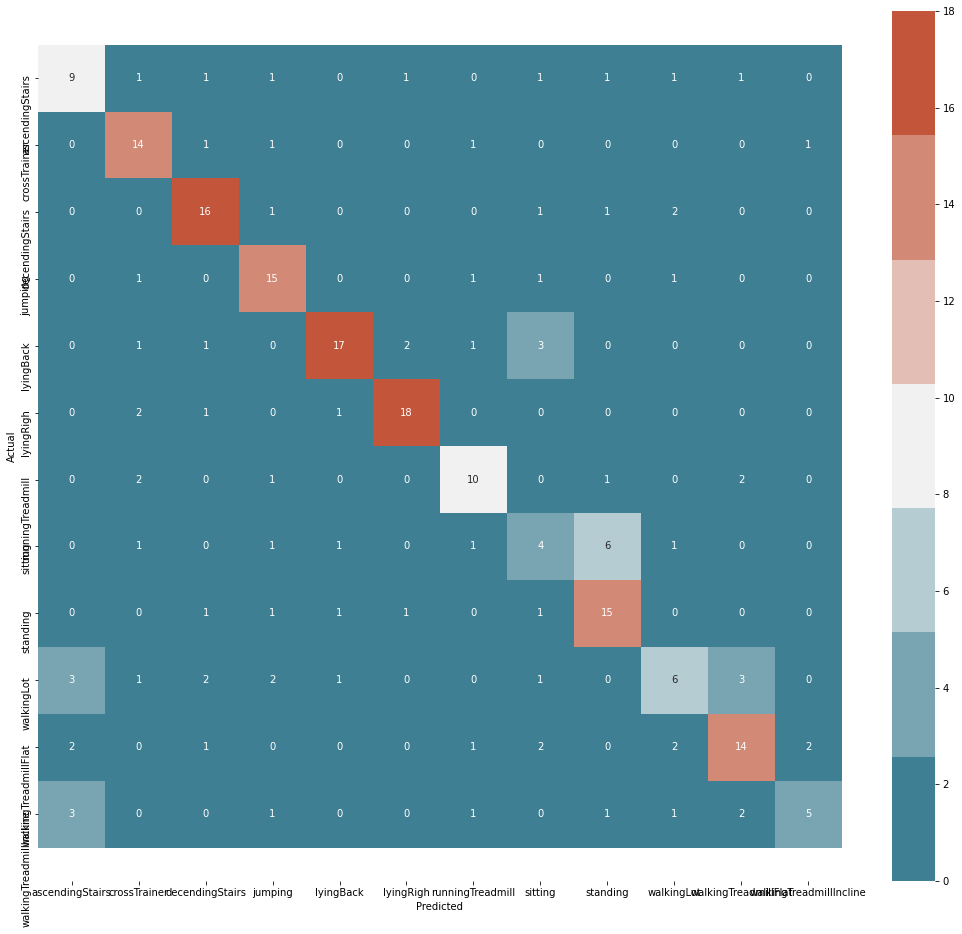

In [170]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(18, 16)) 
    ax = sns.heatmap(cm, annot = True, fmt = "d", cmap = sns.diverging_palette(220, 20, n = 7), ax = ax)

    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()
    
plot_cm(enc.inverse_transform(y_test), enc.inverse_transform(y_pred), enc.categories_[0])

In [189]:
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

8/8 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.48      0.65      0.55        17
           1       0.61      0.61      0.61        18
           2       0.76      0.62      0.68        21
           3       0.65      0.89      0.76        19
           4       0.79      0.60      0.68        25
           5       0.85      0.77      0.81        22
           6       0.56      0.62      0.59        16
           7       0.29      0.40      0.33        15
           8       0.50      0.45      0.47        20
           9       0.39      0.37      0.38        19
          10       0.45      0.38      0.41        24
          11       0.58      0.50      0.54        14

    accuracy                           0.57       230
   macro avg       0.58      0.57      0.57       230
weighted avg       0.59      0.57      0.58       230

[[11  0  0  2  0  1  0  0  1  1  1  0]
 [ 0 11  1  0  0  0  4  0  0  0  2  0]
 [ 0

In [191]:
#CNN MODEL (Default Setting)

inputs=keras.Input(shape=(n_timesteps,n_features))

conv_1=tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=2,activation='relu')(inputs)

avg_pooling=tf.keras.layers.GlobalAveragePooling1D()(conv_1)

batch_norm=tf.keras.layers.BatchNormalization()(avg_pooling)

output=tf.keras.layers.Dense(n_outputs,activation='softmax')(batch_norm)

cmodel=tf.keras.Model(inputs=inputs,outputs=output)
cmodel.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 5, 54)]           0         
                                                                 
 conv1d_20 (Conv1D)          (None, 1, 64)             17344     
                                                                 
 global_average_pooling1d_2  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 12)                780       
                                                                 
Total params: 18380 (71.80 KB)
Trainable params: 18252 (71.

In [194]:
cmodel.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

history = cmodel.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.1, shuffle = True)
print(cmodel.summary())

Epoch 1/100
26/26 [==============================] - 1s 7ms/step - loss: 2.1885e-04 - accuracy: 1.0000 - val_loss: 4.7099 - val_accuracy: 0.4086
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 2.0601e-04 - accuracy: 1.0000 - val_loss: 4.6583 - val_accuracy: 0.4086
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 2.5980e-04 - accuracy: 1.0000 - val_loss: 4.5883 - val_accuracy: 0.3871
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 2.0655e-04 - accuracy: 1.0000 - val_loss: 4.6599 - val_accuracy: 0.3871
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 3.4544e-04 - accuracy: 1.0000 - val_loss: 4.8004 - val_accuracy: 0.4086
Epoch 6/100
26/26 [==============================] - 0s 2ms/step - loss: 3.4651e-04 - accuracy: 1.0000 - val_loss: 4.7584 - val_accuracy: 0.4086
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 3.4973e-04 - accuracy: 1.0000 - val_loss: 4.6822 - val_ac

26/26 [==============================] - 0s 2ms/step - loss: 9.4337e-05 - accuracy: 1.0000 - val_loss: 5.2559 - val_accuracy: 0.4301
Epoch 58/100
26/26 [==============================] - 0s 2ms/step - loss: 6.1193e-05 - accuracy: 1.0000 - val_loss: 5.2804 - val_accuracy: 0.4194
Epoch 59/100
26/26 [==============================] - 0s 2ms/step - loss: 5.3280e-05 - accuracy: 1.0000 - val_loss: 5.2388 - val_accuracy: 0.4194
Epoch 60/100
26/26 [==============================] - 0s 2ms/step - loss: 4.0029e-05 - accuracy: 1.0000 - val_loss: 5.2098 - val_accuracy: 0.4194
Epoch 61/100
26/26 [==============================] - 0s 2ms/step - loss: 4.2865e-05 - accuracy: 1.0000 - val_loss: 5.1876 - val_accuracy: 0.4194
Epoch 62/100
26/26 [==============================] - 0s 2ms/step - loss: 5.2012e-05 - accuracy: 1.0000 - val_loss: 5.1795 - val_accuracy: 0.4194
Epoch 63/100
26/26 [==============================] - 0s 3ms/step - loss: 5.9969e-05 - accuracy: 1.0000 - val_loss: 5.1510 - val_accuracy

In [195]:
from sklearn.metrics import classification_report,confusion_matrix


y_pred = cmodel.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

8/8 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.39      0.41      0.40        17
           1       0.55      0.67      0.60        18
           2       0.58      0.67      0.62        21
           3       0.60      0.63      0.62        19
           4       0.67      0.56      0.61        25
           5       0.69      0.50      0.58        22
           6       0.50      0.38      0.43        16
           7       0.35      0.40      0.38        15
           8       0.45      0.45      0.45        20
           9       0.28      0.26      0.27        19
          10       0.56      0.42      0.48        24
          11       0.25      0.43      0.32        14

    accuracy                           0.49       230
   macro avg       0.49      0.48      0.48       230
weighted avg       0.51      0.49      0.49       230

[[ 7  1  0  2  0  0  0  1  2  2  1  1]
 [ 1 12  1  0  0  0  2  0  0  0  0  2]
 [ 0